## <center> D19037 - Vighnesh Tamse - Digit Recognizer for MNIST data

### Objective :
To build a Feed Forward Network for MNIST Classification in Pytorch in not more than 10 epochs.

### Parameters :
1. Number of parameters used in the model ( lower the better)
2. Validation data accuracy (higher the better)
3. Experimentation details to reach at the final set of parameters used in the model.
4. Uploading your code on your github profile.

***Importing necessary libraries***

In [0]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch import optim

***Reading the MNIST data and splitting into train and test data***

In [0]:
transform=transforms.Compose([transforms.ToTensor()])
trainset=datasets.MNIST('~/.pytorch/MNIST_data/',train=True,transform=transform,download=True)
testset=datasets.MNIST('~/.pytorch/MNIST_data/',train=False,transform=transform,download=True)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=256,shuffle=True,num_workers=0)
testloader=torch.utils.data.DataLoader(testset,batch_size=256,shuffle=True,num_workers=0)

***Creating a Feed Forward Network***

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x
        
model=Network()

#Adam - adaptive learning rate optimization algorithm
optimizer=optim.SGD(model.parameters(),lr=1e-2,weight_decay=1e-6, momentum=0.9, nesterov=True)

'''Using the Negative Log Likelihood loss function to define how well your neural network classifies data.
The negative log-likelihood function is defined as loss=-log(y) and produces a high value when the values of the output layer 
are evenly distributed and low. In other words, there's a high loss when the classification is unclear.'''
criterion=nn.NLLLoss()

***Calculating train and test loss for each forward propagation for each batch size, and then back propagating to minimize the loss. This is repeated until all the data has been covered which constitutes to 1 epoch.***

In [205]:
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        #images=images.view(images.shape[0],-1)
        log_ps=model(images)
        loss=criterion(log_ps,labels) # a single value for ex 2.33
        loss.backward() 
        optimizer.step()
        running_loss += loss.item() * images.shape[0] ## (2.33*64 + 2.22*64 + 2.12*33) / 138 
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset)))    

Epoch: 1/10..  Training Loss: 0.035..  Test Loss: 0.068..  Test Accuracy: 0.982
Epoch: 2/10..  Training Loss: 0.034..  Test Loss: 0.069..  Test Accuracy: 0.981
Epoch: 3/10..  Training Loss: 0.033..  Test Loss: 0.074..  Test Accuracy: 0.981
Epoch: 4/10..  Training Loss: 0.030..  Test Loss: 0.071..  Test Accuracy: 0.982
Epoch: 5/10..  Training Loss: 0.031..  Test Loss: 0.072..  Test Accuracy: 0.982
Epoch: 6/10..  Training Loss: 0.028..  Test Loss: 0.075..  Test Accuracy: 0.982
Epoch: 7/10..  Training Loss: 0.027..  Test Loss: 0.072..  Test Accuracy: 0.982
Epoch: 8/10..  Training Loss: 0.025..  Test Loss: 0.075..  Test Accuracy: 0.981
Epoch: 9/10..  Training Loss: 0.026..  Test Loss: 0.068..  Test Accuracy: 0.984
Epoch: 10/10..  Training Loss: 0.026..  Test Loss: 0.067..  Test Accuracy: 0.983


***Checking whether the predicted value is same as actual value.***

In [206]:
import pandas as pd
pd.DataFrame({"Predicted":top_class.view(top_class.shape[0]),"Actual":labels})

,Predicted,Actual
0,4,4
1,0,0
2,1,1
3,2,2
4,9,9
5,8,8
6,2,2
7,6,6
8,9,9
9,9,9


In [207]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


***Plotting the training and validation loss curves.***

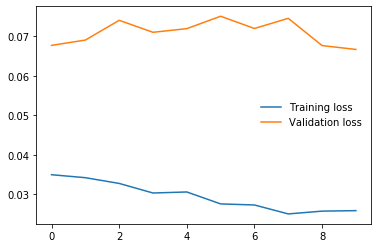

In [208]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [209]:
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)
top_prob,top_class=ps.topk(1,dim=1)
top_class.item(),labels[0]

(3, tensor(3))

***Printing the state of the model***

In [210]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
fc1.weight 	 torch.Size([256, 784])
fc1.bias 	 torch.Size([256])
fc2.weight 	 torch.Size([128, 256])
fc2.bias 	 torch.Size([128])
fc3.weight 	 torch.Size([64, 128])
fc3.bias 	 torch.Size([64])
fc4.weight 	 torch.Size([10, 64])
fc4.bias 	 torch.Size([10])


***Printing the state of the optimizer***

In [211]:
# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Optimizer's state_dict:
state 	 {140460888812928: {'momentum_buffer': tensor([[-2.2991e-07,  2.2155e-07,  3.2681e-07,  ..., -2.4464e-07,
          3.3687e-07,  2.9705e-07],
        [ 3.1012e-07,  2.8412e-07,  2.9594e-07,  ..., -7.4846e-08,
          1.7701e-07,  2.3206e-08],
        [-2.9963e-07,  2.1111e-07,  2.5997e-07,  ...,  5.2695e-08,
         -2.5856e-07, -2.4651e-07],
        ...,
        [-1.3282e-07, -7.3023e-08, -1.7630e-07,  ..., -2.7354e-07,
         -3.3733e-07, -5.2316e-09],
        [ 2.7173e-07,  3.1839e-07,  3.5619e-07,  ..., -8.4232e-09,
         -2.6176e-08, -3.3377e-07],
        [ 1.6045e-07, -3.1025e-07,  7.9105e-08,  ...,  3.2183e-07,
         -2.3738e-07, -7.1490e-09]])}, 140460888730216: {'momentum_buffer': tensor([-3.2325e-03,  2.5778e-03,  4.8344e-02, -4.1885e-03,  3.1665e-03,
        -2.3131e-03, -3.2891e-03,  1.9298e-03, -4.5489e-04, -1.6295e-02,
         7.4755e-04,  1.6886e-03,  1.1619e-02,  1.0836e-02,  3.3721e-03,
         7.2863e-03, -3.8732e-02, -3.094

***Calculating Number of parameters***

In [212]:
print("Our model: \n\n", model, '\n')


pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

Our model: 

 Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 



242762

***Conclusion :***

The model was built with combination of various parameters, using different optimizer functions, tuning the hyperparameters, for 1 and 2 hidden layers, for different batch sizes and for different values of epoch and the observations were recorded in an excel sheet for  and monitoring.

There were two models that gave the best accuracy: <br>
Model 1: **98.2%**<br>
Architecture description:<br>
1. Batch Size: 64<br>
2. Learning rate: 0.001
3. Number of parameters: 111146<br>
4. Dropout: 0.2<br>
5. Optimizer: Adam<br>
6. Activation Function: ReLU<br>
7. Input layer: 784<br>
8. Hidden layer 1: 128<br>
9. Hidden layer 2: 64<br>
10. Output layer: 10<br>
11. Number of epochs: 10<br>

Model 2: **98.3%**<br>
Architecture description:<br>
1. Batch Size: 256<br>
2. Learning rate: 0.001
3. Number of parameters: 242762<br>
4. Dropout: 0.2<br>
5. Optimizer: SGD(lr=1e-2,decay=1e-6, momentum=0.9, nesterov=True)<br>
6. Activation Function: ReLU<br>
7. Input layer: 784<br>
8. Hidden layer 1: 256<br>
9. Hidden layer 2: 128<br>
10. Output layer: 10<br>
11. Number of epochs: 10<br>